# Problemas reais em Datasets
Na maioria das vezes, datasets vem com dados faltantes ou errados. 
Antes de tudo, é necessário decidir o que fazer com essas lacunas:
* ignorar
* remover 
* Preencher

Vamos considerar um exemplo real.  Faça o download do seguinte dataset:

https://archive.ics.uci.edu/ml/datasets/air+quality
Some important notes about the dataset:


*   Missing data is marked as -200
*   There are several missing data
*   The separator char is ';'

Neste exemplo, consideraremos que o arquivo csv está na mesma pasta deste notebook. Para isto, será necessário "enxergar" o google drive como um diretório.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display


In [5]:
#You need to change your file location
#index_col="Date"
df = pd.read_csv("AirQualityUCI.csv",  sep=';', decimal=',',parse_dates=["Date"])

display(df)


c:\Users\luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13/03/2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '14/03/2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15/03/2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\luiza\AppData\Local\Programs\Python\Python310\lib\site-packag

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-10-03,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,2004-10-03,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,2004-10-03,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,2004-10-03,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,2004-10-03,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  Unnamed: 15    0 non-

In [8]:
#Viewing just the temperature
print(df['T'])

0       13.6
1       13.3
2       11.9
3       11.0
4       11.2
        ... 
9466     NaN
9467     NaN
9468     NaN
9469     NaN
9470     NaN
Name: T, Length: 9471, dtype: float64


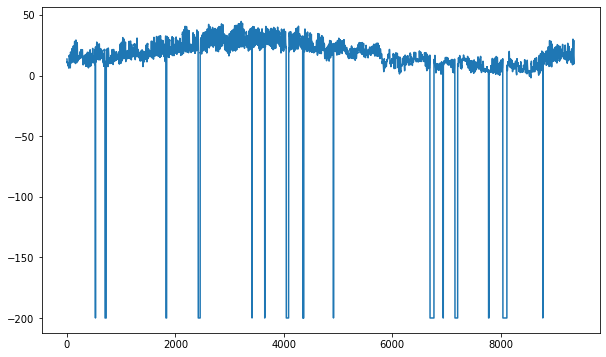

In [9]:
#ploting temperature
plt.figure(figsize=(10, 6))
#plt.plot(time[start:end], series[start:end], format, label=label)
plt.plot(df['T'])
plt.show()

As we can see!!! **Bizarre**! What does it means temperature -200?? 
If we dismiss this information and calculate some metric, e.g average temperature, we obtain an wrong result.


In [ ]:
#reloading the dataframe setting the missing values.
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/AirQualityUCI.csv", na_values=['-200'],  sep=';', decimal=',',parse_dates=["Date"])
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-10-03,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,2004-10-03,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,2004-10-03,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,2004-10-03,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,2004-10-03,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


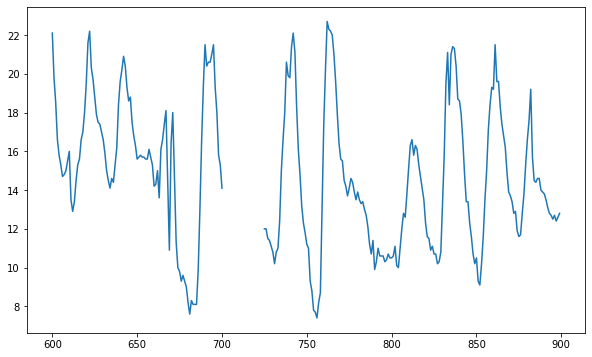

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['T'][600:900]) #zooming
#plt.plot(df['T']) 
plt.show()

### Lidando com dados faltantes

* Dropping null data
   * dropna()
* Filling forward an backward
    * fillna()
* Interpolating
    * interpolate

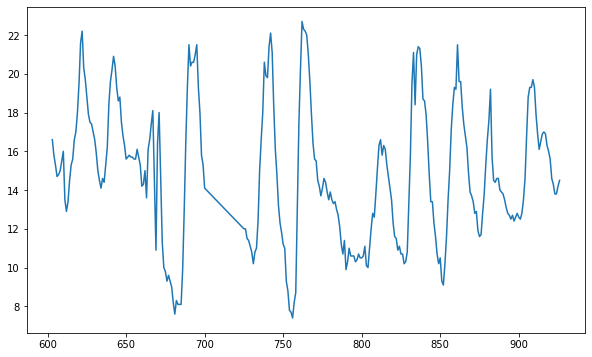

In [ ]:
df2  = df['T']
df2 = df2.dropna(axis='rows')

plt.figure(figsize=(10, 6))
plt.plot(df2[600:900]) #zooming
plt.show()

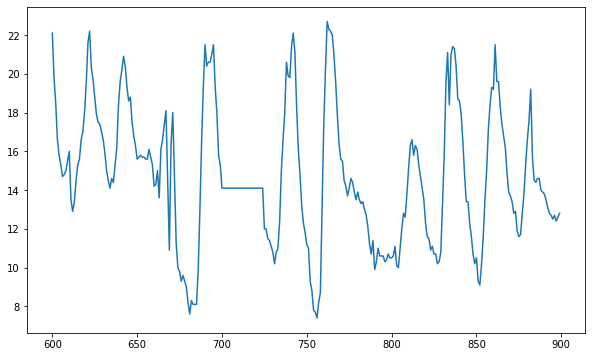

In [ ]:
#Evaluating several methods of filling NaN values.
#See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
df2  = df['T']
#df2 = df2.fillna(0)
df2 = df2.fillna(method = 'ffill')
#df2 = df2.fillna(method = 'bfill')
plt.figure(figsize=(10, 6))
plt.plot(df2[600:900]) #zooming
plt.show()

Interpolation may solve the problem.  
Consult https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html to see the best method.

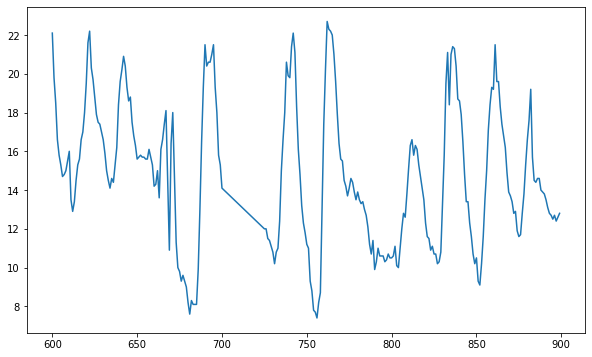

In [ ]:
#Interpolation may give appropriate values
df2  = df['T']
df2 = df2.interpolate(method='values')
#df2 = df2.interpolate(method='quadratic')
plt.figure(figsize=(10, 6))
plt.plot(df2[600:900]) #zooming
plt.show()

**Correlação**:

Qualquer relação estatística (causal ou não causal) entre duas variáveis, ver [Wikipedia](https://pt.wikipedia.org/wiki/Correla%C3%A7%C3%A3o).

A biblioteca Pandas implementa a função [corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) que calcula a correlação entre as variáveis de uma matriz pelos métodos de pearson (default), kendall e spearman. 

Duas variáveis podem ter alta correlação (1.0) ou serem inversamente correlacionadas (-1.0).

In [ ]:
corr = df.corr()
corr

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
CO(GT),1.000000,0.879288,0.889734,0.931078,0.915514,0.795028,-0.703446,0.683343,0.630703,0.854182,0.022109,0.048890,0.048556,NaN,NaN
PT08.S1(CO),0.879288,1.000000,0.790670,0.883795,0.892964,0.713654,-0.771938,0.641529,0.682881,0.899324,0.048627,0.114606,0.135324,NaN,NaN
NMHC(GT),0.889734,0.790670,1.000000,0.902559,0.877696,0.812685,-0.771135,0.731193,0.853267,0.766723,0.391587,-0.191454,0.269738,NaN,NaN
C6H6(GT),0.931078,0.883795,0.902559,1.000000,0.981950,0.718839,-0.735744,0.614474,0.765731,0.865689,0.198956,-0.061681,0.167972,NaN,NaN
PT08.S2(NMHC),0.915514,0.892964,0.877696,0.981950,1.000000,0.704435,-0.796703,0.646245,0.777254,0.880578,0.241373,-0.090380,0.186933,NaN,NaN
NOx(GT),0.795028,0.713654,0.812685,0.718839,0.704435,1.000000,-0.655707,0.763111,0.233731,0.787046,-0.269683,0.221032,-0.149323,NaN,NaN
PT08.S3(NOx),-0.703446,-0.771938,-0.771135,-0.735744,-0.796703,-0.655707,1.000000,-0.652083,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017,NaN,NaN
NO2(GT),0.683343,0.641529,0.731193,0.614474,0.646245,0.763111,-0.652083,1.000000,0.157360,0.708128,-0.186533,-0.091759,-0.335022,NaN,NaN
PT08.S4(NO2),0.630703,0.682881,0.853267,0.765731,0.777254,0.233731,-0.538468,0.157360,1.000000,0.591144,0.561270,-0.032188,0.629641,NaN,NaN
PT08.S5(O3),0.854182,0.899324,0.766723,0.865689,0.880578,0.787046,-0.796569,0.708128,0.591144,1.000000,-0.027172,0.124956,0.070751,NaN,NaN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


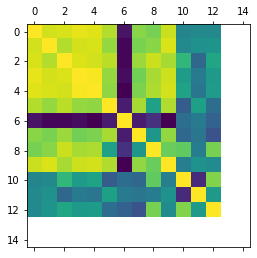

In [ ]:
plt.matshow(corr)
plt.show()

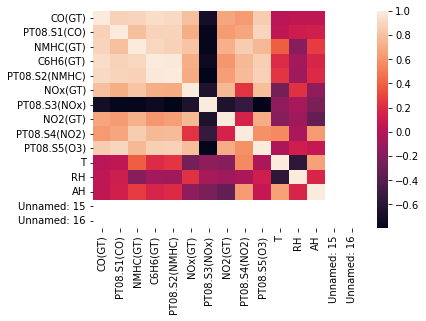

In [ ]:
#Seaborn version
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)